<div align="center">
    <h1>NYC Airbnb - Data Science Project</h1>
    <h2>Rafael García Cuéllar</h2>
    <h2>10/10/2019</h2>
</div>

1. [Introduction & Abstract](#Introduction-&-Abstract)
2. [ETL Process](#ETL-Process)
    - [Extraction](#Extraction)
    - [Transformation & Cleaning](#Transformation-&-Cleaning)
    - [Load](#Load)
3. [Understanding our Data](#Understanding-our-Data)
4. [Analysis](#Analysis)
    - [Descriptive Anaysis](#Descriptive-Anaysis)
    - [Diagnostic Analysis](#Diagnostic-Analysis)
    - [Predictive Analysis](#Predictive-Analysis)
5. [Metrics](#Metrics)
    - [Graphs & Histograms](#Graphs-&-Histograms)
    - [Bloxpots](#Bloxpots)
6. [Data Visualizations](#Data-Visualizations)
    - [HeatMaps & Spatial Analysis](#HeatMaps-&-Spatial-Analysis)
7. [Predictions](#Predictions)
    - [Machine Learning](#Machine-Learning)
    - [Modeling](#Modeling)
    - [Linear Regression Model](#Linear-Regression-Model)
8. [Results](#Results)
9. [Conclusion](#Conclusion)


<div align="center"><img src="https://wallpapercave.com/wp/ut0D0Sy.jpg"></div>

# Introduction & Abstract

<div align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/69/Airbnb_Logo_B%C3%A9lo.svg" width="200" height="121" alt="Aibnb Logo"/>
</div>

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 81,000 cities and 191 countries worldwide. The company's name comes from "air mattress B&B.”

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. This public dataset is part of Airbnb, and the original source can be found on this website.

# ETL Process

In computing, extract, transform, load (ETL) is the general procedure of copying data from one or more sources into a destination system which represents the data differently from the source(s) or in a different context than the source(s). The ETL process became a popular concept in the 1970s and is often used in data warehousing.

Data extraction involves extracting data from homogeneous or heterogeneous sources; data transformation processes data by data cleansing and transforming them into a proper storage format/structure for the purposes of querying and analysis; finally, data loading describes insertion of data into the last target database such as an working data store, a data mart, data lake or a data warehouse.

> In our case we are going to use a well-formed CSV file provided by Kaggle then we'll extract all the needed data, transform and clean the raw data to improve quality of this dataset and finally load this data through data science tool like [Pandas](https://pandas.pydata.org/) *(open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language)* to Python data structures such a `lists`, `tuples`, `dictionaries`...

## Extraction

The first part of an ETL process involves extracting the data from the source system(s). In many cases, this represents the most important aspect of ETL, since extracting data correctly sets the stage for the success of subsequent processes. Most data-warehousing projects combine data from different source systems. Each separate system may also use a different data organization and/or format.

An intrinsic part of the extraction involves data validation to confirm whether the data pulled from the sources has the correct/expected values in a given domain (such as a pattern/default or list of values). If the data fails the validation rules, it is rejected entirely or in part. The rejected data is ideally reported back to the source system for further analysis to identify and to rectify the incorrect records.

> In this section, we are going to introduce all needed files (in this case, it's going to be a CSV file) where we can find the facts to work with so let's extract our raw data.
> Before start we have to import the required libraries and frameworks in order to make this IPython Notebook works ! 

### Importing Packages

In [ ]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

'''Spatial Visualizations'''
import folium
import folium.plugins

'''NLP - WordCloud'''
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [ ]:
'''Align Center Plot Outputs in Notebook''' 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    // display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Check versions

> Print out the versions of all the packages & libraries that we are going to work with: 

In [ ]:
print("Numpy version: {}".format(np.version.version))
print("Pandas version: {}".format(pd.__version__))
print("Matplotlib version: {}".format(matplotlib.__version__))
print("Seaborn version: {}".format(sns.__version__))
print("Geopandas version: {}".format(gpd.__version__))
print("Plotly version: {}".format(plotly.__version__))
print("Folium version: {}".format(folium.__version__))
print("WordCloud version: {}".format(wordcloud.__version__))
print("Scikit-Learn version: {}".format(sklearn.__version__))

In [ ]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## Load

Loading data into the target data warehouse database is the last step of the ETL process. In a typical Data warehouse, huge volume of data needs to be loaded in a relatively short period (nights). Hence, load process should be optimized for performance.
#### Types of Loading:
* Initial Load — populating all the Data Warehouse tables
* Incremental Load — applying ongoing changes as when needed periodically.
* Full Refresh —erasing the contents of one or more tables and reloading with fresh data.

> In our case, we'll use the Initial Load since we just have one data source, in this case it's a dataset in a CSV format. So on... we are going to read the complete CSV file to work with all this data as we said early.  

In [ ]:
'''Read in airbnb from csv file'''
airbnb=pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
airbnb.head()

In [ ]:
airbnb.tail()

## Transformation & Cleaning 

In the data transformation stage, a series of rules or functions applied to the extracted data to prepare it for loading into the end target.
We may apply one or more of the following transformation types may be required to meet the business and technical needs of the server or data warehouse:
* Selecting only certain columns to load: (or selecting null columns not to load). For example, if the source data has three columns name, host_name, and longitude & latitude, then the choice may take only name and host_name. Or, the selection mechanism may ignore all those records where price is not present (price = null).
* Translating coded values: (e.g., if the source system codes male as "1" and female as "2", but the warehouse codes male as "M" and female as "F")
* Encoding free-form values: (e.g., mapping "Male" to "M")
* Deriving a new calculated value: (e.g., sale_amount = qty * unit_price)
* Sorting or ordering the data based on a list of columns to improve search performance
* Splitting a column into multiple columns (e.g., converting a comma-separated list, specified as a string in one column, into each value in different columns)
* Disaggregation in repeating columns
* Looking up and validating the relevant data from tables or referential files
* Applying any form of data validation; failed validation may result in a full rejection of the data, partial rejection, or no rejection at all, and thus none, some, or all the data is handed over to the next step depending on the rule design and exception handling; many of the above transformations may result in exceptions, e.g., when a code translation parsers an unknown code in the extracted data

#### Checking for null values in the Airbnb dataset

In [ ]:
airbnb.isnull().sum().sort_values(ascending=False)

In [ ]:
# Method allows the user to analyze and drop Rows/Columns with Null values in different ways
# airbnb.dropna()

REPLACE_NAME_VALUE = "$"
REPLACE_HOST_NAME_VALUE = "#"

# Fill NA/NaN values using the specified method.
airbnb['name'].fillna(REPLACE_NAME_VALUE, inplace=True)           
airbnb['host_name'].fillna(REPLACE_HOST_NAME_VALUE, inplace=True)

# Dropping the column last review as more than 10,000 data points contains null values.
# airbnb.drop(['last_review'], axis=1, inplace=True)
# airbnb.drop(['reviews_per_month'], axis=1, inplace=True)

#### Filter rows using Pandas chaining

In [ ]:
print("Length of Airbnb DataFrame that match with Name = \"{}\": {}".format(REPLACE_NAME_VALUE, len(airbnb[airbnb.name == REPLACE_NAME_VALUE])))
print("Length of Airbnb DataFrame that match with Host_Name = \"{}\": {}".format(REPLACE_HOST_NAME_VALUE, len(airbnb[airbnb.host_name == REPLACE_HOST_NAME_VALUE])))

In [ ]:
'''Show the first 5 rows in airbnb dataset'''
airbnb.head()

# Understanding our Data

#### Dataframe Length and shape 

In [ ]:
len(airbnb.index)    # airbnb.index more faster than airbnb

In [ ]:
airbnb.shape

In [ ]:
timeit airbnb.shape

#### Retrieves rows based on index label

In [ ]:
airbnb.loc[0]

#### Print a concise summary of a DataFrame.

In [ ]:
# airbnb.dtypes
airbnb.info(verbose=True)

#### Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [ ]:
airbnb.describe()

# Analysis

Data analysis is a process of inspecting, cleansing, transforming and modeling data with the goal of discovering useful information, informing conclusions and supporting decision-making. Data analysis has multiple facets and approaches, encompassing diverse techniques under a variety of names, and is used in different business, science, and social science domains. In today's business world, data analysis plays a role in making decisions more scientific and helping businesses run more effectively. We'll outline the 3 main types of data analytics: ***Descriptive Analysis***, ***Diagnostic Analysis*** & ***Predictive Analysis***.

## Descriptive Analysis

Descriptive analytics are the backbone of reporting—it's impossible to have BI tools and dashboards without it. It addresses your basic **"HOW MANY"**, **"WHEN"**, **"WHERE"**, and **"WHAT"** questions. Once again, this can be further separated into two categories: ad hoc reporting and canned reports. 
* Canned report is one that has been designed before and has information around a given subject.
* Ad hoc reports, however, are designed by you and usually aren't scheduled but are more in-the-moment. They're useful for obtaining more in-depth information about a specific query.

#### Number of Room Types Available

In [ ]:
airbnb.room_type.value_counts()

In [ ]:
room_type_plot = sns.countplot(x="room_type", order = airbnb.room_type.value_counts().index, data=airbnb)
room_type_plot.set(xlabel='Room Types', ylabel='', title='Room Type Count Bar')
for bar in room_type_plot.patches:
    h = bar.get_height()
    room_type_plot.text(
        bar.get_x() + bar.get_width()/2.,  # bar index (x coordinate of text)
        h,                                 # y coordinate of text
        '%d' % int(h),                     # y label
        ha='center', 
        va='bottom',
        color='black',
        fontweight='bold',
        size=14)
    
plt.show()

> According to the above graphic we can see that the most rented room type is the **"Entire home/apartment"** with a total count of 25.409 following by
the **"Private Room"** and **"Shared Room"** with 22.326 and 1.160 respectively. It's obviously that all the people who rent an Airbnb prefer an entire home !

#### Percentage Representation of Neighbourhood Group in Pie

In [ ]:
airbnb.neighbourhood_group.value_counts(dropna = False, normalize = True)

In [ ]:
labels = airbnb.neighbourhood_group.value_counts().index
sizes = airbnb.neighbourhood_group.value_counts().values
explode = (0.1, 0.2, 0.3, 0.4, 0.6)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                                   shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set(title="Most Rented Neighbourhood Group Pie Plot")
ax.legend(wedges, labels,
          title="Neighbourhood Groups",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
plt.show()

#### Neighbourhoods grouped by Neighbourhood Group in BarChart

In [ ]:
for neighbourhood_group in airbnb.neighbourhood_group.unique():
    neighbourhoods = airbnb.neighbourhood[airbnb.neighbourhood_group == neighbourhood_group].unique()
    print("{} has {} Neighbourhoods: {}...\n".format(
        neighbourhood_group, 
        len(neighbourhoods), 
        neighbourhoods[:5]
    ))

In [ ]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, subplots = plt.subplots(len(airbnb.neighbourhood_group.unique()), 1, figsize=(65, 45))

for i, neighbourhood_group in enumerate(airbnb.neighbourhood_group.unique()):
    neighbourhoods = airbnb.neighbourhood[airbnb.neighbourhood_group == neighbourhood_group]
    ax = subplots[i]
    x = np.array(neighbourhoods.value_counts().index)
    y = neighbourhoods.value_counts().values
    sns.barplot(x=x, y=y, palette="rocket", ax=ax)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_ylabel(neighbourhood_group)

# Finalize the plot
sns.despine(bottom=True)
f.suptitle('Neighbourhood Group splitted by Neighbourhoods ')
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.show()

> Given this graphic outputs we finally can see, that the most rented neighbourhood group is **Manhattan** 59,1 km² (44.4%) following by **Brooklyn** 180 km² (41.1%) and **Queens** 280 km² (11.6%). As we can see given the last results that as much surface has the neighbourhood group doesn't mean will have the most rented zone, moreover it's the smallest one !

> For the other hand, given the graphic above (Neighbourhood Group splitted by Neighbourhoods)  we finally came up that the most rented neighbourhoods are:
* Williamsburg (Brooklyn).
* Harlem (Manhattan).
* Astoria (Queens).
* St.George (Staten Island)
* Kinsbridge (Bronx)

#### Density and Distribution of Prices for each Neighbourhood Group

In [ ]:
sns.set(style="whitegrid")
# Parameters
FILTER_PRICE_VALUE = 800

# Filter airbnb prices for shake of the visualization
sub_airbnb_price = airbnb[airbnb.price < FILTER_PRICE_VALUE]

# Create ViolinPlot
fig, ax = plt.subplots(figsize=(12, 12))
density_neigh_price_plot = sns.violinplot(ax=ax, x="neighbourhood_group", y="price", 
                                          hue="neighbourhood_group", data=sub_airbnb_price, 
                                          palette="muted", dodge=False)
density_neigh_price_plot.set(xlabel='Neighberhood Group', ylabel='Price ($)', 
                             title='Density and Distribution of prices for each Neighberhood Group')
ylabels = ['${}'.format(x) for x in density_neigh_price_plot.get_yticks()]
density_neigh_price_plot.set_yticklabels(ylabels)
plt.show()

> According to the "Density and Distribution of prices for each Neighborhood Group" plot we can set up that the average of all the apartment & room prices are between 50\$ - 200\$, but is more remarkable for the average zones like: **Queens**, **Staten Island** and **Bronx**.

> For the other hand, we can notice a slightly overpriced in Manhattan and Brooklyn neighborhood group, with the majority of density in  prices between 200\$ - 400\$ it's definitely a difference if you are going to get a rent in the next days and you want to save your wallet!

> We finally decide there is a notice over cost if you'd like to rent a room/apartment in the **Manhattan** neighbourhood group between 100\$ - 600\$. 

#### Minimum of nights by Room Type.

##### Understanding [Boxplot](#Boxplots)

<div align="center">
    <img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png"  width="450" height="450">
</div>

In [ ]:
# Parameters
MINIMUM_NIGHTS_FILTER = 15      # Filter minimum nights to 2 weeks (15 days/nights)

# Data Preparation
sub_airbnb = airbnb[airbnb.minimum_nights < MINIMUM_NIGHTS_FILTER]

# BoxPlot Creation 
fig, ax = plt.subplots(figsize=(12, 12))
sns.set(style="ticks", palette="pastel")
nights_per_room = sns.boxplot(x="room_type", y="minimum_nights", ax=ax,
                              hue="room_type", dodge=False, linewidth=2.5,
                              data=sub_airbnb,)

nights_per_room.set(xlabel='Minimum Night', ylabel='Room Type', 
                             title='Minimum of nights per Room Type')
plt.legend(loc='upper right')
plt.show()

> Following the above Boxplot we could translate this representation of data into medians to see the average of minimum nights per room type. Finally getting this results:
    
|   Room Type	|   Minimum	|   Q1-Q2	|   Median	|   Q3-Q4	|   Maximum	|
|---	|:-:	|:-:	|:-:	|:-:	|:-:	|
|   Private Room	|   -	|   0-2	|   2	|   2-3	|   3-6	|
|   Entire home/apt	|   0-2	|   2-3	|   3	|   3-4	|   4-7	|
|   Shared Room	|   -	|   -	|   -	|   0-2	|   2-3	|

<br>
> We could come up with the idea that if we'd like to rent a long-term Airbnb we should go into an entire home or apartment, if's not we always can get a shared room.
> PD: This Bloxplot has been filtered, in order to avoid an extreme and fake values from dataset like 2000 minimum nights and so on... 

#### Distribution Price by Neighbourhood Groups

In [ ]:
# Set up the matplotlib figure
f, subplots = plt.subplots(
                len(airbnb.neighbourhood_group.unique()), 
                figsize=(12, 20)
            )

for i, neighbourhood_group in enumerate(airbnb.neighbourhood_group.unique()):
    neighbourhoods = airbnb[airbnb.neighbourhood_group == neighbourhood_group]['price']
    ax = subplots[i]
    dist_plot = sns.distplot(neighbourhoods, ax=ax)
    dist_plot.set_title(neighbourhood_group)

# Finalize the plot
plt.tight_layout(h_pad=1)
plt.show()

> As we can see, in our grid of distribution plots we already have the data distributed by price and splitted by Neighbourhood group, so according to the plot above we finally can determinate that:
* **Brooklyn** averages around 70-500\$ per night depending upon the neighbourhood.
* **Manhattan** averages around 80-490\$ ...
* **Queens** averages around 60-280\$...
* **Staten Island** averages around 50-800\$...
* **Bronx** averages around 50-450\$ ...

#### Number of reviews grouped by Host Id

In [ ]:
# Data Preparation
serie_airbnb = airbnb.groupby("host_id")["number_of_reviews"].agg("sum")
frame = { 'host_id': serie_airbnb.index, 'number_of_reviews': serie_airbnb.values }
df_airbnb = pd.DataFrame(frame).sort_values('number_of_reviews', ascending=False).head(50)

# BarPlot creation 
f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x="number_of_reviews", y="host_id", 
            data=df_airbnb, color="b", ax=ax, orient="h")

# Add a legend and informative axis label
plt.show()

We already have the top host_id's with more number of reviews of the dataset, now we are going to print out the names that belongs to each host_id:

In [ ]:
top_10_host_id = df_airbnb.host_id.unique()[:10]
names = airbnb.host_name[airbnb.host_id.isin(top_10_host_id)].unique()
names

## Diagnostic Analysis

Diagnostic data analytics is the process of examining data to understand cause and event, or why something happened. It responds to questions like **"WHAT HAPPENED"**, **"WHY SOMETHING HAPPENED"**...
Techniques like drill-down, data discovery, data mining, and correlations are often employed. In particular, diagnostic data analytics help answer why something occurred. Organizations make use of this type of analytics as it creates more connections between data and identifies patterns of behavior.

#### Matrix Correlation (Table Visualization)

In [ ]:
airbnb.corr().style.background_gradient(cmap='coolwarm')

#### HeatMap Correlation Visualization

In [ ]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(airbnb.corr(),annot=True)

We applied the [Pearson Coefficient of Correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), which does Compute pairwise correlation of columns, excluding NA/null values, to get the measure of the linear correlation between two variables X and Y.

> No strong correlation except number_of_reviews vs reviews_per_month

### Natural Processing Language

Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

> In our case we are going to carry out kind of NLP to get relevant data from our text in the dataset like the names, host names, descriptions of Airbnb's etc... 

#### Word Cloud

A wordcloud or tag cloud is a visual representation of words that accomplished a text, where the size is bigger for those words that appear more often.

In [ ]:
from PIL import Image

def makeWordCloudImage(text, colormap="viridis", imageUrl=None):
    if imageUrl is not None:
        nyc_mask = np.array(Image.open(imageUrl))
        wc = WordCloud(background_color="white", colormap=colormap, mask=nyc_mask, contour_width=1.5, contour_color='steelblue')
    else:
        wc = WordCloud(background_color="white",width=1920, height=1080,max_font_size=200, max_words=200, colormap=colormap)
    wc.generate(text)
    
    # Show WordCloud
    f, ax = plt.subplots(figsize=(12, 12))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

#### Neighbourhoods WordCloud

In [ ]:
# Get list of neighbourhood Words 
neighbourhood_text = " ".join([neighbourhood for neighbourhood in airbnb["neighbourhood"]])
makeWordCloudImage(neighbourhood_text, imageUrl="../input/new-york-city-airbnb-open-data/New_York_City_.png")

#### Host Names WordCloud

In [ ]:
# Get list of neighbourhood Words 
host_name_text = " ".join([host_name for host_name in airbnb["host_name"]])
makeWordCloudImage(host_name_text, colormap="plasma")

#### Names WordCloud

In [ ]:
# Get list of names Words 
names_text = " ".join([name for name in airbnb["name"]])
makeWordCloudImage(names_text, colormap="RdYlGn")

## Predictive Analysis

Predictive analysis is used to identify trends, correlations, and causation and attempts to answer the question **“WHAT IS LIKE TO HAPPEN”**. This type of analytics utilizes previous data to make predictions about future outcomes.

This type of analysis is another step up from the descriptive and diagnostic analyses. Predictive analysis uses the data we have summarized to make logical predictions of the outcomes of events. Predictive Analytics has different stages such as *Data Modelling*, *Data Collection*, *Statistics* and *Deployment* whereas Data Science has stages of *Data Extraction*, *Data Processing*, and *Data Transformations* to obtain some useful information out of it.
There are many techniques used in Predictive Analytics such as *Data mining*, *Artificial Intelligence*, *Machine learning*, *Statistics*, and modeling etc., to analyze existing data to predict unknown events of future.

# Metrics

Metrics are **measures of quantitative assessment** commonly used for assessing, comparing, and tracking performance or production. Generally, a group of metrics will typically be used to build a dashboard that management or analysts review on a regular basis to support performance assessments, opinions, and business strategies.

> The most common metrics are: *Mean*, *Median*, *Standard Deviation*, *Variance*, +Proportion*, *Mode*, *Range*, *Quintile(s)*, *Rank*...

#### Graphs & Histograms

#### 365 Availability group by Neighbourhood Group & order by Price

In [ ]:
# Filter data
AIRBNB_LIMIT_SIZE = 5000
sub_airbnb = airbnb[:AIRBNB_LIMIT_SIZE].sort_values('price')

# Show Interactive Plot
fig = px.bar(sub_airbnb, x="price", y="neighbourhood_group", color="availability_365", orientation='h',
             hover_data=["host_name", "minimum_nights"],
             height=400,
             title='365 Availability Study | Price')

fig.update_layout(
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Price",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Neighbourhood Group",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)

fig.show()

#### Scatter Graph showing Number of reviews/Availability 365 per Host ID/ Host Name 

In [ ]:
fig = px.scatter(airbnb, x="availability_365", y="host_id",
	         size="number_of_reviews", color="neighbourhood_group",
                 hover_name="host_name", title="Number of reviews/Availability 365 per Host ID/ Host Name")

fig.update_layout(legend_orientation="h")
fig.update_layout(
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Availability 365",
            font=dict(
                family="Courier New, monospace",
                size=13,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Host Id",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)

fig.show()

#### Bloxpots

In [ ]:
# generate an array of rainbow colors by fixing the saturation and lightness of the HSL
# representation of colour and marching around the hue.
# Plotly accepts any CSS color format, see e.g. http://www.w3schools.com/cssref/css_colors_legal.asp.
neighbourhoods = airbnb.neighbourhood.unique()
N = len(neighbourhoods)  # Number of Box 
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

fig = go.Figure(data=[go.Box(
    x = neighbourhoods,
    y = airbnb[airbnb.neighbourhood == neighbourhood].number_of_reviews,
    name = neighbourhood,
    marker_color=c[i]
    ) for i, neighbourhood in enumerate(neighbourhoods)])

# Style Plot
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=True),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.update_layout(
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Neighbourhood",
            font=dict(
                family="Courier New, monospace",
                size=13,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Number of Reviews",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)

fig.update_layout(title_text="Bloxpot Number of Reviews per Neighbourhood")
fig.show()

# Data Visualizations


Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.

## HeatMaps & Spatial Analysis

Spatial analysis includes any of the formal techniques which study entities using their topological, geometric, or geographic properties. Also, includes a variety of techniques, many still in their early development, using different analytic approaches and applied in fields as data science, mathematics, statistics... 
In a more restricted sense, spatial analysis is the technique applied to structures at the human scale, most notably in the analysis of geographic data.

#### Spatial Analysis by Neighbourhood Groups

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

# Show Background image
img=plt.imread('../input/new-york-city-airbnb-open-data/New_York_City_.png', 0)
coordenates_to_extent = [-74.258, -73.7, 40.49, 40.92]
ax.imshow(img, zorder=0, extent=coordenates_to_extent)

# Plotting
scatter_map = sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, ax=ax, data=airbnb)
ax.grid(True)
plt.legend(title='Neighbourhood Groups')
plt.show()

#### Price Overview in a HeatMap Normalization

In [ ]:
# Filter values
FILTER_PRICE_VALUE = 400 
sub_airbnb = airbnb[airbnb.price < FILTER_PRICE_VALUE]

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 12))

cmap = plt.get_cmap('jet') # ColorMaps
c = sub_airbnb.price           # color, sequence, or sequence of color, optional
alpha = 0.5                # The alpha blending value, between 0 (transparent) and 1 (opaque).
label = "airbnb"
price_heatmap = ax.scatter(sub_airbnb.longitude, sub_airbnb.latitude, label=label, c=c, 
                            cmap=cmap, alpha=0.4)

plt.title("Heatmap by Price $")
plt.colorbar(price_heatmap)
plt.grid(True)
plt.show()

> Following the above Heatmap sequenced by price, we can confirm that the most **expensive** airbnbs are in **Manhattan** neighbourhood zone which is also the more rented as we could confirm in the first plot !
> The rest of zones are regularly proportionate and all of them have the about same price.

#### Distribution of Airbnb's in New York City (HeatMap)

In [ ]:
# Cretion of Leaflet map
map = folium.Map([40.7128,-74.0060],zoom_start=11)
folium.plugins.HeatMap(airbnb[['latitude','longitude']].dropna(),
                       radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map)
display(map)

#### Reference Map of Predominant household

<div align="center">
    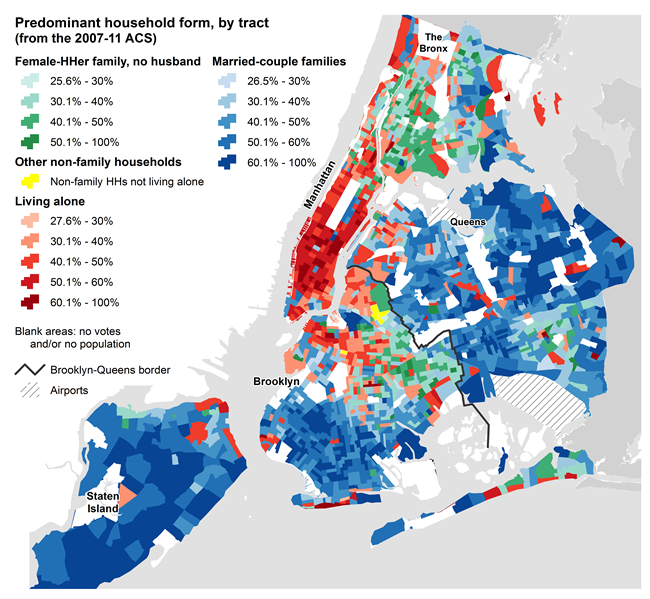
</div>

# Predictions

The Prediction process should be iterate over these steps before get a stable output prediction: 
1. **Define project** : Define the project outcomes, deliverable, scope of the effort, business goals, identify the data sets that are going to be used.
2. **Data collection** : Data mining for predictive analytics prepares data from multiple sources for analysis. This provides a complete view of customer interactions.
3. **Data analysis** : Data Analysis is the process of inspecting, cleaning and modelling data with the objective of discovering useful information, arriving at conclusion
4. **Statistics** : Statistical Analysis enables to confirm the assumptions, hypothesis and test them using standard statistical models.
5. **Modelling** : Predictive modelling provides the ability to automatically create accurate predictive models about future. There are also options to choose the best solution with multi-modal evaluation.
6. **Deployment** : Predictive model deployment provides the option to deploy the analytical results into everyday decision-making process to get results, reports and output by automating the decisions based on the modelling.
7. **Model monitoring** : Models are managed and monitored to review the model performance to make sure that it is providing the results expected.

> In this case, we'll be focus on Price Predictions in order to dive into possible future prices based on real Airbnb's price data. Using Machine Learning techniques and with the power of Linear Regression Models & Decisions Tree algorithms between others. Also, introduce of latest ML Python packages to work with like Scikit Learn, Tensorflow...

## Machine Learning

**Machine learning** is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. Machine learning focuses on the development of computer programs that can access data and use it learn for themselves. Machine learning algorithms are often categorized as supervised or unsupervised.

+ **Supervised machine learning** algorithms can apply what has been learned in the past to new data using labeled examples to predict future events. 

+ In contrast, **Unsupervised machine learning** algorithms are used when the information used to train is neither classified nor labeled. Unsupervised learning studies how systems can infer a function to describe a hidden structure from unlabeled data. 

+ **Semi-supervised machine learning** algorithms fall somewhere in between supervised and unsupervised learning, since they use both labeled and unlabeled data for training – typically a small amount of labeled data and a large amount of unlabeled data. 

+ **Reinforcement machine learning** algorithms is a learning method that interacts with its environment by producing actions and discovers errors or rewards. Trial and error search and delayed reward are the most relevant characteristics of reinforcement learning. 

#### Preprocessing and preparing Data for Prediction

> Load again the dataset from CSV file to avoid missing data, errors or other warnings.

In [ ]:
'''Read in airbnb from csv file & Preparing Data'''
airbnb=pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

airbnb.drop(['name','id','host_name','last_review'],axis=1,inplace=True)
airbnb['reviews_per_month']=airbnb['reviews_per_month'].replace(np.nan, 0)

In [ ]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(airbnb['neighbourhood_group'])
airbnb['neighbourhood_group']=le.transform(airbnb['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(airbnb['neighbourhood'])
airbnb['neighbourhood']=le.transform(airbnb['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(airbnb['room_type'])
airbnb['room_type']=le.transform(airbnb['room_type'])

airbnb.sort_values(by='price',ascending=True,inplace=True)

airbnb.head()

In [ ]:
'''Reversing Labeling Transform'''
list(le.inverse_transform(airbnb['room_type']))[:10]

## Modeling

## Linear Regression Model

In [ ]:
'''Train LRM'''
lm = LinearRegression()

X = airbnb[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = airbnb['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

In [ ]:
'''Get Predictions & Print Metrics'''
predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100,
        mean_absolute_error(y_test,predicts)
        ))

> + **[Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)**: Mean squared error regression loss, or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. <br>
> + **[R^2 (coefficient of determination)](https://en.wikipedia.org/wiki/Coefficient_of_determination)** Regression score function: best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). <br>
> + **[Mean absolute error regression loss](https://en.wikipedia.org/wiki/Mean_absolute_error)**: Is a measure of difference between two continuous variables. Assume X and Y are variables of paired observations that express the same phenomenon.


## Gradient Boosted Regressor Model

Gradient Boosted (GB) builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [ ]:
'''Gradient Boosted Regressor'''
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

In [ ]:
'''Get Predictions & Metrics'''
predicts2 = GBoost.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts2)),
        r2_score(y_test,predicts2) * 100,
        mean_absolute_error(y_test,predicts2)
        ))

# Results

### Predictions (Linear Regression Model)
#### Actual Values VS Predicted Values

In [ ]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)

error_airbnb.head(5)

In [ ]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

#### Linear Model Predictions

In [ ]:
plt.figure(figsize=(16,8))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

### Predictions 2 (Gradient Boosted Regressor Model)
#### Actual Values VS Predicted Values

In [ ]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts2.flatten()}).head(20)

error_airbnb.head(5)

In [ ]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

#### Gradient Boosted Regressor model Predictions

In [ ]:
plt.figure(figsize=(16,8))
sns.regplot(predicts2,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Gradient Boosted Regressor model Predictions")
plt.show()

# Conclusion

> Summarizing our findings, suggesting other features

This Airbnb ('AB_NYC_2019.csv') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. 

First, we have been processing and transforming the dataset in order to clean and refine the data with actions like dropped duplications, replaced null values to standarized ones, remove columns and finally applied ETL process, then we analyzed from the most basics plots and graphics with visualizations like: "Number of Room Types Available" using Bar Plots, "Percentage Representation of Neighbourhood Group in Pie" using Pie Plot, "Density and Distribution of Prices for each Neighbourhood Group" using Violin Plot...
Also, hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings. After that, we proceeded with analyzing boroughs and neighborhood/neighborhood groups listing densities and what areas were more popular than another. Next, we put good use of our latitude and longitude columns and used to create a geographical heatmap color-coded by the price of listings.
We found the most reviewed listings and analyzed some additional attributes. For our data exploration purposes, it also would be nice to have couple extra features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; addition of these features would help to find the best-reviewed hosts for NYC along with 'number_of_review' column that is provided. 
Further, we started Diagnostic Analysis section to shoe the most used tools of Data Scientists to see what happened and try to understand the past to take advantage in the future using "Matrix Correlation" or "Natural Processing Language" with Word Cloud showing us the most used words in, for example, the Airbnb name or reviews... 

Lastly, we got into Predictive Analysis using the latest stack technology in order to predict the price of Airbnb's over the year. We have used Machine Learning as application of Artificial Intelligence (AI), and we also applied the most optimized and newest algorithms like: "Linear Regression Model" & "Gradient Boosted Regressor Model" where we got a positive results coming up with the generalized increase in prices in New York City.

Overall, we discovered a very good number of interesting relationships between features and explained each step of the process. This data analytics is very much mimicked on a higher level on Airbnb Data/Machine Learning team for better business decisions, control over the platform, marketing initiatives, implementation of new features and much more. Therefore, I hope this kernel helps everyone!